In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/global-superstore-dataset/superstore.csv


# Introduction

This notebook presents an end-to-end analysis of the Global Superstore dataset, focusing on understanding sales performance, customer behavior, and shipping efficiency across multiple regions and markets.

The analysis follows a structured data analytics workflow:

1. Data Cleaning & Preparation

Checked dataset shape and structure

Reviewed column names, value counts, and data types

Identified and handled missing values and duplicates

Renamed columns for better readability

Converted Order Date and Ship Date to datetime format

Engineered a new feature to calculate order processing time (days taken to ship an order after it was placed)

2. Exploratory Data Analysis (EDA)

Sales and Profit Analysis across categories and sub-categories

Regional and Segment Analysis to compare performance across markets

Shipping Analysis to evaluate processing time by ship mode

Customer Insights to identify high-value customers and profitability patterns

3. Data Visualization

Used visualizations to communicate insights clearly, including:

Bar charts 

Time-series plots

Heatmaps

Boxplots for shipping performance

All analyses were performed using Python (Pandas,NumPY, Matplotlib, and Seaborn) with a focus on generating business-driven insights and supporting data-informed decision-making.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
store = pd.read_csv('/kaggle/input/global-superstore-dataset/superstore.csv')

In [4]:
store

,Category,City,Country,Customer.ID,Customer.Name,Discount,Market,记录数,Order.Date,Order.ID,...,Sales,Segment,Ship.Date,Ship.Mode,Shipping.Cost,State,Sub.Category,Year,Market2,weeknum
0,Office Supplies,Los Angeles,United States,LS-172304,Lycoris Saunders,0.0,US,1,2011-01-07 00:00:00.000,CA-2011-130813,...,19,Consumer,2011-01-09 00:00:00.000,Second Class,4.37,California,Paper,2011,North America,2
1,Office Supplies,Los Angeles,United States,MV-174854,Mark Van Huff,0.0,US,1,2011-01-21 00:00:00.000,CA-2011-148614,...,19,Consumer,2011-01-26 00:00:00.000,Standard Class,0.94,California,Paper,2011,North America,4
2,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05 00:00:00.000,CA-2011-118962,...,21,Consumer,2011-08-09 00:00:00.000,Standard Class,1.81,California,Paper,2011,North America,32
3,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05 00:00:00.000,CA-2011-118962,...,111,Consumer,2011-08-09 00:00:00.000,Standard Class,4.59,California,Paper,2011,North America,32
4,Office Supplies,Los Angeles,United States,AP-109154,Arthur Prichep,0.0,US,1,2011-09-29 00:00:00.000,CA-2011-146969,...,6,Consumer,2011-10-03 00:00:00.000,Standard Class,1.32,California,Paper,2011,North America,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,Office Supplies,Los Angeles,United States,AM-103604,Alice McCarthy,0.2,US,1,2014-12-03 00:00:00.000,CA-2014-109701,...,69,Corporate,2014-12-04 00:00:00.000,Same Day,5.15,California,Binders,2014,North America,49
51286,Office Supplies,Los Angeles,United States,AM-103604,Alice McCarthy,0.2,US,1,2014-12-03 00:00:00.000,CA-2014-109701,...,9,Corporate,2014-12-04 00:00:00.000,Same Day,0.44,California,Binders,2014,North America,49
51287,Office Supplies,Los Angeles,United States,HR-147704,Hallie Redmond,0.2,US,1,2014-12-18 00:00:00.000,CA-2014-106964,...,12,Home Office,2014-12-21 00:00:00.000,First Class,0.31,California,Binders,2014,North America,51
51288,Office Supplies,Los Angeles,United States,RM-196754,Robert Marley,0.2,US,1,2014-12-25 00:00:00.000,CA-2014-145219,...,90,Home Office,2014-12-26 00:00:00.000,First Class,15.95,California,Binders,2014,North America,52


# Data Cleaning and Analysis


In [5]:
store.shape

(51290, 27)

In [6]:
store.columns

Index(['Category', 'City', 'Country', 'Customer.ID', 'Customer.Name',
       'Discount', 'Market', '记录数', 'Order.Date', 'Order.ID', 'Order.Priority',
       'Product.ID', 'Product.Name', 'Profit', 'Quantity', 'Region', 'Row.ID',
       'Sales', 'Segment', 'Ship.Date', 'Ship.Mode', 'Shipping.Cost', 'State',
       'Sub.Category', 'Year', 'Market2', 'weeknum'],
      dtype='object')

In [7]:
store.value_counts

<bound method DataFrame.value_counts of               Category         City        Country Customer.ID  \
0      Office Supplies  Los Angeles  United States   LS-172304   
1      Office Supplies  Los Angeles  United States   MV-174854   
2      Office Supplies  Los Angeles  United States   CS-121304   
3      Office Supplies  Los Angeles  United States   CS-121304   
4      Office Supplies  Los Angeles  United States   AP-109154   
...                ...          ...            ...         ...   
51285  Office Supplies  Los Angeles  United States   AM-103604   
51286  Office Supplies  Los Angeles  United States   AM-103604   
51287  Office Supplies  Los Angeles  United States   HR-147704   
51288  Office Supplies  Los Angeles  United States   RM-196754   
51289  Office Supplies  Los Angeles  United States   FH-143654   

          Customer.Name  Discount Market  记录数               Order.Date  \
0      Lycoris Saunders       0.0     US    1  2011-01-07 00:00:00.000   
1         Mark Van 

In [8]:
store.isnull().sum()

Category          0
City              0
Country           0
Customer.ID       0
Customer.Name     0
Discount          0
Market            0
记录数               0
Order.Date        0
Order.ID          0
Order.Priority    0
Product.ID        0
Product.Name      0
Profit            0
Quantity          0
Region            0
Row.ID            0
Sales             0
Segment           0
Ship.Date         0
Ship.Mode         0
Shipping.Cost     0
State             0
Sub.Category      0
Year              0
Market2           0
weeknum           0
dtype: int64

In [9]:
store.duplicated().sum()

0

In [10]:
#Standardize the format
store = store.rename(columns = {"记录数":"Number of Records",
                      "weeknum":"Weeknum",
                      "Customer.ID":"CustomerID",
                      "Row.ID ":"RowID",
                      "Ship.Date":"Ship_Date", 
                      "Shipping.Cost":"Shipping_Cost",
                      "Ship.Mode":"Ship_Mode", 
                      "Order.Priority":"Order_Priority", 
                      "Sub.Category":"Sub_Category",
                      "Product.Name ": "Product_Name",
                      "Product.ID ": "ProductID",
                      "Order.ID": "OrderID",
                      "Order.Date":"Order_Date",
                       "Customer.Name":"Customer_Name"
                               })

In [11]:
store

,Category,City,Country,CustomerID,Customer_Name,Discount,Market,Number of Records,Order_Date,OrderID,...,Sales,Segment,Ship_Date,Ship_Mode,Shipping_Cost,State,Sub_Category,Year,Market2,Weeknum
0,Office Supplies,Los Angeles,United States,LS-172304,Lycoris Saunders,0.0,US,1,2011-01-07 00:00:00.000,CA-2011-130813,...,19,Consumer,2011-01-09 00:00:00.000,Second Class,4.37,California,Paper,2011,North America,2
1,Office Supplies,Los Angeles,United States,MV-174854,Mark Van Huff,0.0,US,1,2011-01-21 00:00:00.000,CA-2011-148614,...,19,Consumer,2011-01-26 00:00:00.000,Standard Class,0.94,California,Paper,2011,North America,4
2,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05 00:00:00.000,CA-2011-118962,...,21,Consumer,2011-08-09 00:00:00.000,Standard Class,1.81,California,Paper,2011,North America,32
3,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05 00:00:00.000,CA-2011-118962,...,111,Consumer,2011-08-09 00:00:00.000,Standard Class,4.59,California,Paper,2011,North America,32
4,Office Supplies,Los Angeles,United States,AP-109154,Arthur Prichep,0.0,US,1,2011-09-29 00:00:00.000,CA-2011-146969,...,6,Consumer,2011-10-03 00:00:00.000,Standard Class,1.32,California,Paper,2011,North America,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,Office Supplies,Los Angeles,United States,AM-103604,Alice McCarthy,0.2,US,1,2014-12-03 00:00:00.000,CA-2014-109701,...,69,Corporate,2014-12-04 00:00:00.000,Same Day,5.15,California,Binders,2014,North America,49
51286,Office Supplies,Los Angeles,United States,AM-103604,Alice McCarthy,0.2,US,1,2014-12-03 00:00:00.000,CA-2014-109701,...,9,Corporate,2014-12-04 00:00:00.000,Same Day,0.44,California,Binders,2014,North America,49
51287,Office Supplies,Los Angeles,United States,HR-147704,Hallie Redmond,0.2,US,1,2014-12-18 00:00:00.000,CA-2014-106964,...,12,Home Office,2014-12-21 00:00:00.000,First Class,0.31,California,Binders,2014,North America,51
51288,Office Supplies,Los Angeles,United States,RM-196754,Robert Marley,0.2,US,1,2014-12-25 00:00:00.000,CA-2014-145219,...,90,Home Office,2014-12-26 00:00:00.000,First Class,15.95,California,Binders,2014,North America,52


In [12]:
store.columns

Index(['Category', 'City', 'Country', 'CustomerID', 'Customer_Name',
       'Discount', 'Market', 'Number of Records', 'Order_Date', 'OrderID',
       'Order_Priority', 'Product.ID', 'Product.Name', 'Profit', 'Quantity',
       'Region', 'Row.ID', 'Sales', 'Segment', 'Ship_Date', 'Ship_Mode',
       'Shipping_Cost', 'State', 'Sub_Category', 'Year', 'Market2', 'Weeknum'],
      dtype='object')

In [13]:
store["Order_Date"] = pd.to_datetime(store["Order_Date"]) 
store["Order_Date"]

0       2011-01-07
1       2011-01-21
2       2011-08-05
3       2011-08-05
4       2011-09-29
           ...    
51285   2014-12-03
51286   2014-12-03
51287   2014-12-18
51288   2014-12-25
51289   2014-12-26
Name: Order_Date, Length: 51290, dtype: datetime64[ns]

In [14]:
store["Ship_Date"] = pd.to_datetime(store["Ship_Date"])
store["Ship_Date"]

0       2011-01-09
1       2011-01-26
2       2011-08-09
3       2011-08-09
4       2011-10-03
           ...    
51285   2014-12-04
51286   2014-12-04
51287   2014-12-21
51288   2014-12-26
51289   2014-12-30
Name: Ship_Date, Length: 51290, dtype: datetime64[ns]

In [15]:
# How many days it took order to be shipped after placed.
store['order_processing_time'] = store['Ship_Date'] - store['Order_Date']
store['order_processing_time']

0       2 days
1       5 days
2       4 days
3       4 days
4       4 days
         ...  
51285   1 days
51286   1 days
51287   3 days
51288   1 days
51289   4 days
Name: order_processing_time, Length: 51290, dtype: timedelta64[ns]

 # Exploratory Data Analysis (EDA)


> **Sales And Profit Analyses**

In [16]:
# Find total sales,profit and quantity overall. 
Total_sales = store['Sales'].sum()
print("Total sales:",Total_sales)
Total_profit = store['Profit'].sum()
print("Total Profit:",Total_profit)
Total_quantity = store["Quantity"].sum()
print("Total Quantity:",Total_quantity)

Total sales: 12642905
Total Profit: 1467457.2912800002
Total Quantity: 178312


In [17]:
store.groupby("Product.Name").agg(
    Total_profit = ("Profit","sum"),
    Total_sales = ("Sales","sum")
                  ).sort_values("Total_profit").head(10)

,Total_profit,Total_sales
Product.Name,,
Cubify CubeX 3D Printer Double Head Print,-8879.9704,11100
Lexmark MX611dhe Monochrome Laser Printer,-4589.9730,16830
"Motorola Smart Phone, Cordless",-4447.0380,38935
Cubify CubeX 3D Printer Triple Head Print,-3839.9904,8000
"Bevis Round Table, Adjustable Height",-3649.8940,5655
"Bevis Computer Table, Fully Assembled",-3509.5638,11176
"Rogers Lockers, Blue",-2893.4908,28215
Chromcraft Bull-Nose Wood Oval Conference Tables & Bases,-2876.1156,9918
"Bevis Wood Table, with Bottom Storage",-2782.5880,11134


In [18]:
#List the top 10 products by sales.
store["Product.Name"].head(10)

0                                            Xerox 225
1            Wirebound Service Call Books, 5 1/2" x 4"
2    Adams Phone Message Book, Professional, 400 Me...
3                                           Xerox 1913
4                                            Xerox 223
5      Spiral Phone Message Books with Labels by Adams
6                                           Xerox 2000
7                                           Xerox 1974
8                                           Xerox 1895
9                                           Xerox 1933
Name: Product.Name, dtype: object


> **Find which category generates the highest sales and highest profit**

In [19]:
# Highest Sales
sales_category = store.groupby("Category")['Sales'].sum().sort_values(ascending = False)
sales_category

Category
Technology         4744691
Furniture          4110884
Office Supplies    3787330
Name: Sales, dtype: int64

In [20]:
# Highest Profit
profit_category = store.groupby("Category")['Profit'].sum().sort_values(ascending = False)
profit_category

Category
Technology         663778.73318
Office Supplies    518473.83430
Furniture          285204.72380
Name: Profit, dtype: float64

In [21]:
# Which sub-category has the highest Discount rate?
Sub_cat_discount = store.groupby('Sub_Category')['Discount'].mean().sort_values(ascending=False).idxmax()
Sub_cat_discount

'Tables'

In [22]:
store['Sub_Category'].value_counts()

Sub_Category
Binders        6152
Storage        5059
Art            4883
Paper          3538
Chairs         3434
Phones         3357
Furnishings    3170
Accessories    3075
Labels         2606
Envelopes      2435
Supplies       2425
Fasteners      2420
Bookcases      2411
Copiers        2223
Appliances     1755
Machines       1486
Tables          861
Name: count, dtype: int64

>**Regional & Segment Analysis** 

In [23]:
store['Region'].value_counts()

Region
Central           11117
South              6645
EMEA               5029
North              4785
Africa             4587
Oceania            3487
West               3203
Southeast Asia     3129
East               2848
North Asia         2338
Central Asia       2048
Caribbean          1690
Canada              384
Name: count, dtype: int64

In [24]:
#  Compare sales by region.
region_sales = store.groupby('Region', as_index=False)['Sales'].sum().sort_values('Sales', ascending=False)
region_sales


,Region,Sales
3,Central,2822399
10,South,1600960
7,North,1248192
9,Oceania,1100207
11,Southeast Asia,884438
8,North Asia,848349
5,EMEA,806184
0,Africa,783776
4,Central Asia,752839
12,West,725514


In [25]:
# Identify the city with the highest sales.
high_sales_city = store.groupby('City')['Sales'].sum().sort_values(ascending = False)
high_sales_city

City
New York City    256397
Los Angeles      175857
Manila           120896
Seattle          119552
San Francisco    112690
                  ...  
Ormond Beach          3
Elyria                2
Pensacola             2
Jupiter               2
Abilene               1
Name: Sales, Length: 3636, dtype: int64

In [26]:
# Find the most profitable customer segment.
segment_profitable = store.groupby('Segment')['Profit'].sum().sort_values(ascending = False)
segment_profitable

Segment
Consumer       749239.78206
Corporate      441208.32866
Home Office    277009.18056
Name: Profit, dtype: float64

In [27]:
# Check which country has negative profit.
country_loss = store.groupby('Country',)['Profit'].sum().sort_values()
country_loss

Country
Turkey            -98447.2320
Nigeria           -80750.7180
Netherlands       -41070.0750
Honduras          -29482.3714
Pakistan          -22446.6480
                     ...     
France            109029.0030
United Kingdom    111900.1500
India             129071.8350
China             150683.0850
United States     286397.0217
Name: Profit, Length: 147, dtype: float64

> **Shipping & Order Analysis**

In [28]:
# Which shipping mode has the highest number of orders?
ship_mode = store['Ship_Mode'].value_counts()
high_ship_mode = ship_mode.idxmax()
high_orders = ship_mode.max()

print("Ship mode with highest orders:",high_ship_mode)
print("Highest number of order of ship_mode:",high_orders)



Ship mode with highest orders: Standard Class
Highest number of order of ship_mode: 30775


In [29]:
# Find the average order processing time per ship mode.
avg_processing_time = store.groupby("Ship_Mode")["order_processing_time"].mean()
print("avg_processing_time:",avg_processing_time)

avg_processing_time: Ship_Mode
First Class      2 days 04:21:42.811459027
Same Day         0 days 00:53:50.803406145
Second Class     3 days 05:31:28.175380735
Standard Class   4 days 23:57:08.744110479
Name: order_processing_time, dtype: timedelta64[ns]


In [30]:
# Identify delays: orders where Ship Date < Order Date.
delays_orders = store[store['Ship_Date']< store['Order_Date']]
delays_orders.shape[0]

0

*No delayed orders were found. All Ship Dates occur on or after their respective Order Dates, indicating clean and consistent date data.*

> **Customer Insights**

In [31]:
# Find the top 10 customers by total spend.
store.columns

Index(['Category', 'City', 'Country', 'CustomerID', 'Customer_Name',
       'Discount', 'Market', 'Number of Records', 'Order_Date', 'OrderID',
       'Order_Priority', 'Product.ID', 'Product.Name', 'Profit', 'Quantity',
       'Region', 'Row.ID', 'Sales', 'Segment', 'Ship_Date', 'Ship_Mode',
       'Shipping_Cost', 'State', 'Sub_Category', 'Year', 'Market2', 'Weeknum',
       'order_processing_time'],
      dtype='object')

In [32]:
# Find the top 10 customers by total spend.
total_customers_spend= store.groupby('Customer_Name')['Sales'].sum().sort_values(ascending = False).head(10)
print('Top ten customer by total spend:',total_customers_spend)

Top ten customer by total spend: Customer_Name
Tom Ashbrook          40489
Tamara Chand          37453
Greg Tran             35552
Christopher Conant    35187
Sean Miller           35170
Bart Watters          32315
Natalie Fritzler      31778
Fred Hopkins          30404
Jane Waco             30288
Hunter Lopez          30246
Name: Sales, dtype: int64


In [33]:
# Identify customers with high sales but low profit.
customer_summary = store.groupby('Customer_Name').agg({
  'Sales': 'sum',
   'Profit':'sum'
    }).reset_index()
high_sales_threshold = customer_summary['Sales'].quantile(0.75)
low_profit_threshold = customer_summary['Profit'].quantile(0.25)
high_sales_low_profit = customer_summary[
    (customer_summary['Sales'] > high_sales_threshold) &
    (customer_summary['Profit'] < low_profit_threshold)
]
high_sales_low_profit

,Customer_Name,Sales,Profit
75,Becky Martin,27173,-1096.92540
96,Brad Eason,18986,978.02410
116,Bruce Stewart,19234,496.95910
143,Charles McCrossin,20156,746.68682
202,Darrin Van Huff,22749,616.32492
210,David Philippe,23730,834.53052
222,Denise Monton,22051,-2597.80290
250,Edward Hooks,21272,671.19340
308,Grant Thornton,20226,-3577.92306
322,Harry Greene,24217,-291.49228


# Data Visualisation

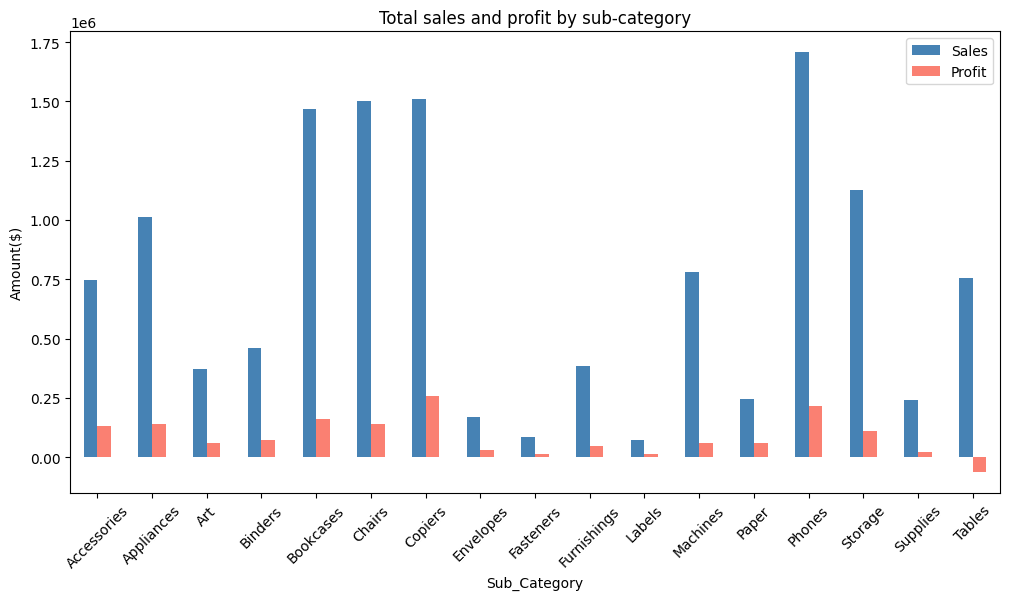

In [34]:
# Show total Sales and Profit by Sub-Category using a grouped bar chart.
# Helps identify which sub-category using a grouped bar chart.
# Aggregate data by sub category
subcat_summary = store.groupby('Sub_Category')[['Sales','Profit']].sum()
subcat_summary.plot(kind='bar', color = ['steelblue','salmon'],figsize=(12,6))
plt.title('Total sales and profit by sub-category')
plt.ylabel('Amount($)')
plt.xticks(rotation = 45)          
plt.show()

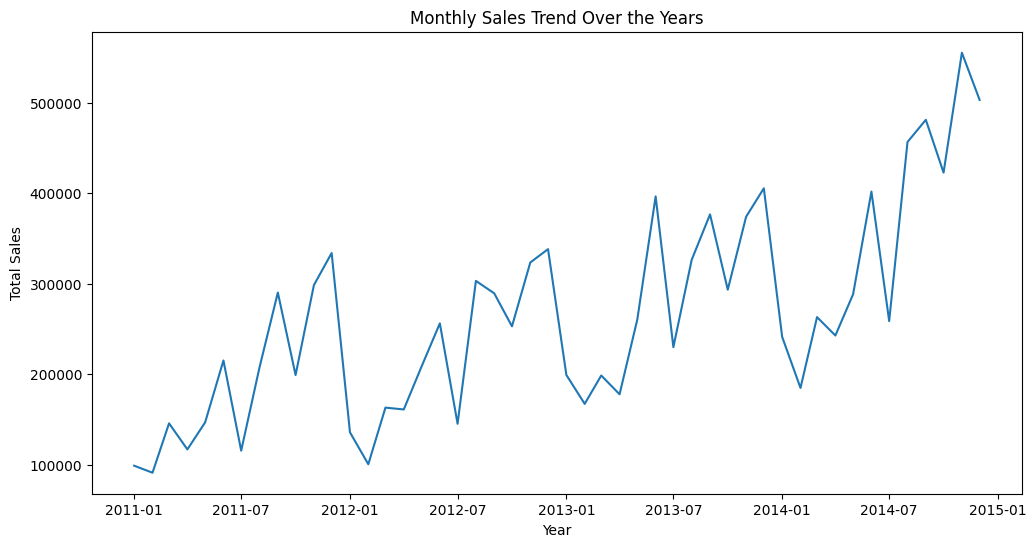

In [35]:
# Plot monthly sales trend over the years using Order.Date.
store["Order_Date"] = pd.to_datetime(store["Order_Date"]) 
store['YearMonth'] = store['Order_Date'].dt.to_period('M')
monthly_sales = store.groupby('YearMonth')['Sales'].sum()
monthly_sales
monthly_sales.index = monthly_sales.index.to_timestamp()
monthly_sales.index
plt.figure(figsize=(12,6))
plt.plot(monthly_sales.index, monthly_sales.values)
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.title('Monthly Sales Trend Over the Years')
plt.show()

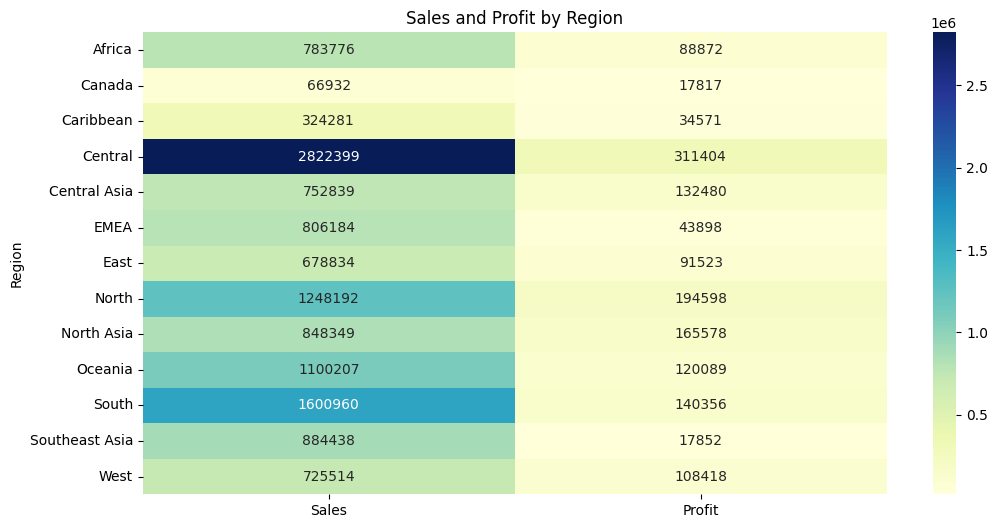

In [36]:
# Compare total Sales and Profit by Region using a side-by-side bar chart or heatmap.
region_summary = store.groupby('Region')[['Sales','Profit']].sum()
plt.figure(figsize=(12,6))
sns.heatmap(region_summary,annot = True, fmt ='.0f',cmap='YlGnBu')
plt.title('Sales and Profit by Region')
plt.show()

This heatmap compares total sales and profit across regions, where darker colors indicate higher values. It helps quickly identify top-performing regions and regions with high sales but low profitability.

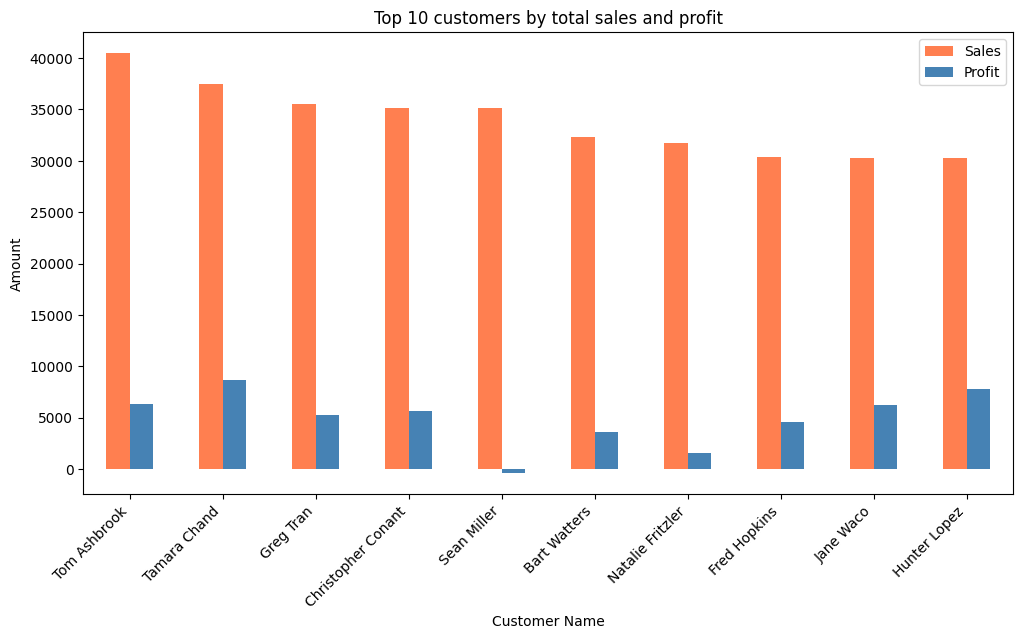

In [37]:
# Plot top 10 customers by total Sales and Profit.
customer_visual = store.groupby('Customer_Name')[['Sales','Profit']].sum()
top_10_cus = customer_visual.sort_values(by='Sales', ascending =False).head(10)
top_10_cus.plot(kind = 'bar',figsize=(12,6), color = ['coral','steelblue'])
plt.title("Top 10 customers by total sales and profit")
plt.xlabel('Customer Name')
plt.ylabel("Amount")
plt.xticks(rotation = 45, ha='right')
plt.show()

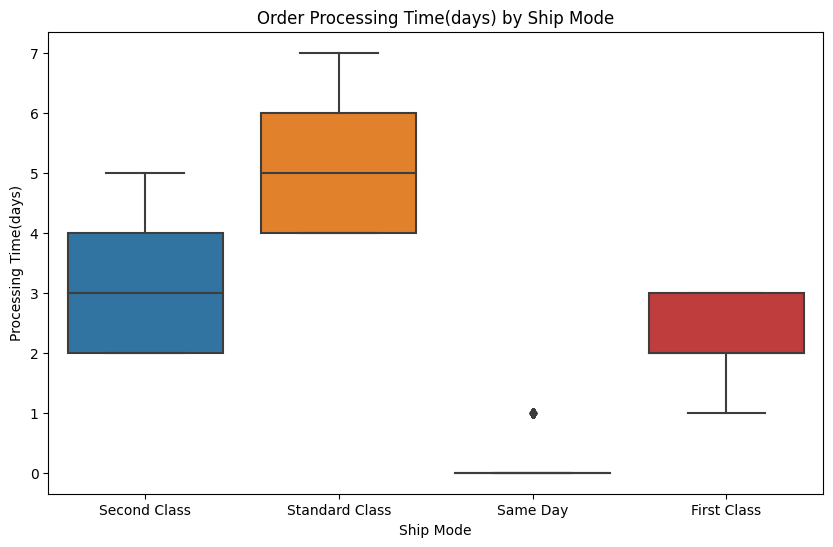

In [38]:
# Create a boxplot of order processing time per Ship Mode.
store['processing_days'] = store['order_processing_time'].dt.days
store['processing_days'] = store['order_processing_time'].dt.total_seconds() / 86400




plt.figure(figsize=(10,6))
sns.boxplot(data=store,x = 'Ship_Mode',y='processing_days')
plt.title("Order Processing Time(days) by Ship Mode")
plt.xlabel("Ship Mode")
plt.ylabel("Processing Time(days)")
plt.show()

**Insights**:
1 day = 24 hours,
1 hour = 60 minutes,
1 minute = 60 seconds,

24×60×60 = 86,400 seconds in a day

Converting timedelta values into numeric days ensures precision and enables meaningful statistical visualization.

Same Day shipping has the lowest median processing time and minimal variability, making it the fastest option.
Standard class shows the highest median processing time and wider spread, indicating frequent delays.